In [13]:
#import sys ; sys.path.insert(0, './resource/asnlib/public')
import sys
from cse6040utils import tibbles_left_matches_right, tibbles_are_equivalent, make_hash, pandas_df_to_markdown_table

import pandas

%matplotlib inline
from matplotlib.pyplot import figure
from seaborn import lineplot, barplot, color_palette, set_palette

In [14]:
def dataset_path(base_filename):
    return f"{base_filename}"

def extract_table_rows(city_html):
    from bs4 import BeautifulSoup
    with open(dataset_path(city_html)) as fp:
        html = BeautifulSoup(fp.read(), 'lxml')
    return html.find_all('tr')

# Pick a city: Atlanta
city, city_name = 'atl', "Atlanta"

# Use `extract_table_rows` to get the table data
rows = extract_table_rows(f"{city}.html")
print(f"The table for {city_name} (`{city}.html`) has {len(rows)} rows, including the header.")
print(f"The returned object, `rows`, has type `{type(rows)}`.")

The table for Atlanta (`atl.html`) has 1582 rows, including the header.
The returned object, `rows`, has type `<class 'bs4.element.ResultSet'>`.


In [15]:
def inspect_html_table_row(row, frontmatter=None):
    if frontmatter is not None:
        print(frontmatter)
    cols = list(row)
    for col_num, col in enumerate(cols):
        print("[{}] '{}'".format(col_num, col.text))
        print("  - Type: {}".format(type(col)))
        print("  - Raw HTML: '{}'".format(str(col)))

header = rows[0]
inspect_html_table_row(header, frontmatter="=== HEADER ===\n") # Header row

=== HEADER ===

[0] 'EMPLOYER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>EMPLOYER</th>'
[1] 'JOB TITLE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>JOB TITLE</th>'
[2] 'BASE SALARY'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>BASE SALARY</th>'
[3] 'LOCATION'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>LOCATION</th>'
[4] 'SUBMIT DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">SUBMIT DATE</th>'
[5] 'START DATE'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th data-date-format="mm/dd/yy">START DATE</th>'
[6] 'CASE STATUS'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<th>CASE STATUS</th>'


In [16]:
first_data_row = rows[1]
inspect_html_table_row(first_data_row, frontmatter="=== FIRST DATA ROW (`rows[1]`) ===\n")

=== FIRST DATA ROW (`rows[1]`) ===

[0] 'PROTIVITI INC'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=PROTIVITI+INC&amp;job=DATA&amp;city=ATLANTA&amp;year=ALL+YEARS">PROTIVITI INC</a></td>'
[1] 'DATA & ANALYTICS BUSINESS INTELLIGENCE MANAGER'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=DATA+%26+ANALYTICS+BUSINESS+INTELLIGENCE+MANAGER&amp;city=ATLANTA&amp;year=ALL+YEARS">DATA &amp; ANALYTICS BUSINESS INTELLIGENCE MANAGER</a></td>'
[2] '97,718'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>97,718</td>'
[3] 'ATLANTA, GA'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=DATA&amp;city=ATLANTA&amp;year=ALL+YEARS">ATLANTA, GA</a></td>'
[4] '12/04/2015'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>12/04/2015</td>'
[5] '01/01/2016'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>01/01/2016</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: 

In [17]:
last_data_row = rows[-1]
inspect_html_table_row(last_data_row, frontmatter="=== LAST DATA ROW (`rows[-1]`) ===\n")

=== LAST DATA ROW (`rows[-1]`) ===

[0] 'VENSIT CORP'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=VENSIT+CORP&amp;job=DATA&amp;city=ATLANTA&amp;year=ALL+YEARS">VENSIT CORP</a></td>'
[1] 'DATAWAREHOUSING SPECIALIST'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=DATAWAREHOUSING+SPECIALIST&amp;city=ATLANTA&amp;year=ALL+YEARS">DATAWAREHOUSING SPECIALIST</a></td>'
[2] '69,500'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>69,500</td>'
[3] 'ATLANTA, GA'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td><a href="index.php?em=&amp;job=DATA&amp;city=ATLANTA&amp;year=ALL+YEARS">ATLANTA, GA</a></td>'
[4] '11/17/2016'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>11/17/2016</td>'
[5] '12/05/2016'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>12/05/2016</td>'
[6] 'CERTIFIED'
  - Type: <class 'bs4.element.Tag'>
  - Raw HTML: '<td>CERTIFIED</td>'


In [18]:
def raw_rows_to_pandas(rows):
    from pandas import DataFrame
    ###
    df_rows=[]
    for row in rows:
        cols = list(row)
        if cols[6].text == 'CERTIFIED':
            df_rows.append([ cols[0].text, cols[1].text, int(cols[2].text.replace(',','')), cols[3].text, int(cols[4].text[-4:])  ])
            #df_rows.append([ cols[0].text, cols[1].text,  cols[3].text  ])
    return DataFrame(df_rows,
                     columns=['EMPLOYER', 'JOB TITLE', 'BASE SALARY','LOCATION',  'YEAR'])  
    #return DataFrame(df_rows,
    #                 columns=['EMPLOYER', 'JOB TITLE', 'LOCATION'])  
           
    
    ###
    
# Demo:
atl = raw_rows_to_pandas(rows[1:])
#print("Found", len(atl), "rows")
#atl.sample(5)
atl

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,YEAR
0,PROTIVITI INC,DATA & ANALYTICS BUSINESS INTELLIGENCE MANAGER,97718,"ATLANTA, GA",2015
1,THE NORTH HIGHLAND COMPANY,DATA & ANALYTICS ENGINEER,65000,"ATLANTA, GA",2019
2,PROTIVITI INC,DATA & ANALYTICS ETL DEVELOPER SENIOR CONSULTANT,95306,"ATLANTA, GA",2016
3,THE COCA-COLA COMPANY,DATA & DECISION SCIENCE MANAGER,74700,"ATLANTA, GA",2015
4,COTIVITI USA LLC,DATA & INSIGHT ANALYST,64063,"ATLANTA, GA",2018
...,...,...,...,...,...
1489,MUTEX SYSTEMS INC,DATAWAREHOUSE ENGINEER SOFTWARE ENGINEER,90000,"ATLANTA, GA",2018
1490,MUTEX SYSTEMS INC,DATAWAREHOUSE ENGINEER SOFTWARE ENGINEER,90000,"ATLANTA, GA",2018
1491,CALIFORNIA CREATIVE SOLUTIONS INC,DATAWAREHOUSE T-SQL DEVELOPER,60000,"ATLANTA, GA",2018
1492,CALIFORNIA CREATIVE SOLUTIONS INC,DATAWAREHOUSE T-SQL DEVELOPER,60000,"ATLANTA, GA",2018


In [19]:
atl_job_titles = atl['JOB TITLE'].unique()
print(f"There are {len(atl_job_titles)} unique job titles in the Atlanta dataset.")
print(f"They are:\n{atl_job_titles}")

There are 198 unique job titles in the Atlanta dataset.
They are:
['DATA & ANALYTICS BUSINESS INTELLIGENCE MANAGER'
 'DATA & ANALYTICS ENGINEER'
 'DATA & ANALYTICS ETL DEVELOPER SENIOR CONSULTANT'
 'DATA & DECISION SCIENCE MANAGER' 'DATA & INSIGHT ANALYST'
 'DATA ANALYSIS & SIMULATION PROF'
 'DATA ANALYSIS & SIMULATION PROFESSIONAL' 'DATA ANALYST'
 'DATA ANALYST  DEVELOPER' 'DATA ANALYST  IT SPECIALIST'
 'DATA ANALYST  TESTER'
 'DATA ANALYST - INFORMATION MANAGEMENT AND GOVERNANCE'
 'DATA ANALYST - ITEM MANAGEMENT' 'DATA ANALYST - SUPPLY CHAIN'
 'DATA ANALYST 1' 'DATA ANALYST 2' 'DATA ANALYST 3' 'DATA ANALYST 4'
 'DATA ANALYST ENGINEER' 'DATA ANALYST ENVIRONMENTAL' 'DATA ANALYST I'
 'DATA ANALYST II' 'DATA ANALYST III' 'DATA ANALYST JR. EPIDEMIOLOGIST'
 'DATA ANALYST LEAD - INFORMATICA ADMINISTRATOR' 'DATA ANALYST SC'
 'DATA ANALYST SR.' 'DATA ANALYST SUPPLY CHAIN'
 'DATA ANALYST, DATA AND ANALYTICS' 'DATA ANALYTIC SCIENTIST'
 'DATA ANALYTICS' 'DATA ANALYTICS & OPERATIONS RESEARCH ANAL

In [20]:
def subset_series_str(s, pattern):
    """Given a Series object, `s`, returns the subset containing the regular expression `pattern`."""
    from pandas import Series
    if not isinstance(s, Series):
        s = Series(s) # Attempt to convert...
    return s[s.str.contains(pattern)]

In [21]:
jobs_with_data_followed_by_scientist = subset_series_str(atl_job_titles, r'.*DATA.*SCIENTIST.*')
jobs_with_data_followed_by_scientist

29                               DATA ANALYTIC SCIENTIST
40                              DATA ANALYTICS SCIENTIST
106                                       DATA SCIENTIST
107                      DATA SCIENTIST  ENGINEER SENIOR
108                              DATA SCIENTIST - CAREER
109                       DATA SCIENTIST - FLIGHT SAFETY
110                        DATA SCIENTIST - INTERMEDIATE
111                              DATA SCIENTIST - ONLINE
112                  DATA SCIENTIST - SPACE OPTIMIZATION
113                                     DATA SCIENTIST 1
114                                     DATA SCIENTIST I
115                                    DATA SCIENTIST II
116                               DATA SCIENTIST PRICING
117                   DATA SCIENTIST, ADVANCED ANALYTICS
118    DATA SCIENTIST-CONSUMER CLIENT & CHANNEL ANALY...
119                        DATA SCIENTIST-TRANSFORMATION
dtype: object

In [22]:
def filter_jobs(df, target_jobs):
    from pandas import DataFrame
    assert isinstance(df, DataFrame), f"`df` has type `{type(df)}` rather than `DataFrame`."
    #assert df.columns.contains('JOB TITLE'), f"`df` does not have a `'JOB TITLE'` column."
    assert all([isinstance(j, str) for j in target_jobs]), f"All entries of `target_jobs` should be strings."
    ###
    #s= df['JOB TITLE']

    
    
    #keep_job = df['JOB TITLE'].str.contains('|'.join(target_jobs))
    #if keep_job.item() == True:
    #    subset=list(keep_job.keys())
    
    
    #short & sweet
    subset=(list(    subset_series_str(    df['JOB TITLE'], '|'.join(target_jobs) ).    keys()      )    )
    #
    
    
    
    #return keep_job
    return df.iloc[subset]
    #return subset
    #return DataFrame(subset,
                     #columns=['JOB TITLE']) 
    ###
    
# Demo: The following should yield only the four target job titles.
target_job_list = ['DATA ANALYST', 'DATABASE ADMINISTRATOR', 'DATA SCIENTIST', 'DATA ENGINEER']
atl_target_jobs = filter_jobs(atl, target_job_list)
print(atl_target_jobs['JOB TITLE'].unique())
#atl_target_jobs

['DATA ANALYST' 'DATA ANALYST  DEVELOPER' 'DATA ANALYST  IT SPECIALIST'
 'DATA ANALYST  TESTER'
 'DATA ANALYST - INFORMATION MANAGEMENT AND GOVERNANCE'
 'DATA ANALYST - ITEM MANAGEMENT' 'DATA ANALYST - SUPPLY CHAIN'
 'DATA ANALYST 1' 'DATA ANALYST 2' 'DATA ANALYST 3' 'DATA ANALYST 4'
 'DATA ANALYST ENGINEER' 'DATA ANALYST ENVIRONMENTAL' 'DATA ANALYST I'
 'DATA ANALYST II' 'DATA ANALYST III' 'DATA ANALYST JR. EPIDEMIOLOGIST'
 'DATA ANALYST LEAD - INFORMATICA ADMINISTRATOR' 'DATA ANALYST SC'
 'DATA ANALYST SR.' 'DATA ANALYST SUPPLY CHAIN'
 'DATA ANALYST, DATA AND ANALYTICS' 'DATA ENGINEER'
 'DATA ENGINEER  HADOOP DEVELOPER' 'DATA ENGINEER ANALYST SENIOR'
 'DATA ENGINEER II' 'DATA ENGINEER III'
 'DATA ENGINEERING ASSOCIATE MANAGER' 'DATA ENGINEERING SENIOR ANALYST'
 'DATA SCIENTIST' 'DATA SCIENTIST  ENGINEER SENIOR'
 'DATA SCIENTIST - CAREER' 'DATA SCIENTIST - FLIGHT SAFETY'
 'DATA SCIENTIST - INTERMEDIATE' 'DATA SCIENTIST - ONLINE'
 'DATA SCIENTIST - SPACE OPTIMIZATION' 'DATA SCIENTIST 1

In [23]:
def normalize_series(s, target):
    from pandas import Series
    assert isinstance(s, Series), f"Object `s` has type `{type(s)}`, not `Series`."
    assert isinstance(target, str), f"`target` is a `{type(target)}`, not a string."
    ###
    #ss=s.copy()
    
    ss = s.str.replace('.*'+ target + '.*',target)
     
    return ss
    ###
    
# Demo: Does your output look as expected?
s_in = pandas.Series(['DATA ANALYTIC SCIENTIST',
                      'BEST DATA SCIENTIST',
                      'DATA SCIENTIST',
                      'DATA SCIENTIST - SPACE OPTIMIZATION',
                      'SCIENTIST DATA'])
s_in.index = [3, 1, 4, 0, 2]
print("=== Before ===\n")
display(s_in)
print("\n=== After ===\n")
normalize_series(s_in, 'DATA SCIENTIST')

=== Before ===



3                DATA ANALYTIC SCIENTIST
1                    BEST DATA SCIENTIST
4                         DATA SCIENTIST
0    DATA SCIENTIST - SPACE OPTIMIZATION
2                         SCIENTIST DATA
dtype: object


=== After ===



3    DATA ANALYTIC SCIENTIST
1             DATA SCIENTIST
4             DATA SCIENTIST
0             DATA SCIENTIST
2             SCIENTIST DATA
dtype: object

In [24]:
TARGET_JOBS = ['DATA SCIENTIST', 'DATA ANALYST', 'DATA ENGINEER', 'DATABASE ADMINISTRATOR']

def reduce_jobs(df, target_jobs=TARGET_JOBS):
    df_reduced = df.copy()
    for title in target_jobs:
        df_reduced['JOB TITLE'] = normalize_series(df_reduced['JOB TITLE'], title)
    return df_reduced

atl_reduced = reduce_jobs(atl)
atl_reduced.sample(5)

,EMPLOYER,JOB TITLE,BASE SALARY,LOCATION,YEAR
243,CAPGEMINI AMERICA INC,DATA ANALYST,89100,"ATLANTA, GA",2016
1413,LOGISOFT TECHNOLOGIES INC,DATABASE ANALYST,80000,"ATLANTA, GA",2018
379,CAPGEMINI AMERICA INC,DATA ANALYST,69100,"ATLANTA, GA",2016
562,NOVALINK SOLUTIONS LLC,DATA ARCHITECT,75000,"ATLANTA, GA",2016
990,SREE INFOTECH LLC,DATABASE ADMINISTRATOR,60000,"ATLANTA, GA",2015


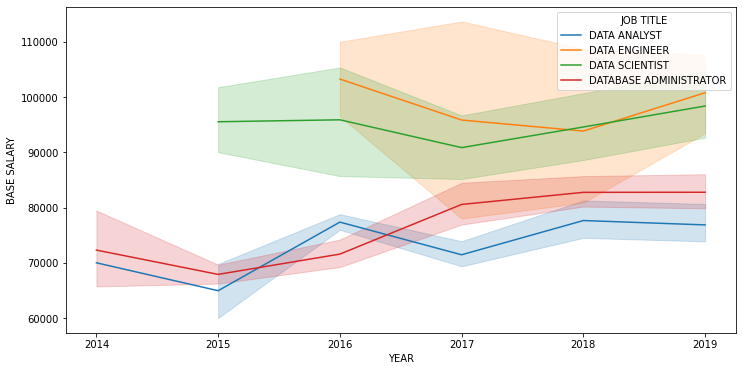

In [25]:
atl_reduced2 = atl_reduced.loc[atl_reduced['JOB TITLE'].isin(TARGET_JOBS)]

fig = figure(figsize=(12, 6))
lineplot(x='YEAR', y='BASE SALARY', hue='JOB TITLE', data=atl_reduced2)
set_palette(color_palette('colorblind'))

In [26]:
def get_median_salaries_by_title(df):
    from pandas import DataFrame
    assert isinstance(df, DataFrame)
    ###
    ndf= df[['JOB TITLE','BASE SALARY']]\
    .groupby(['JOB TITLE'])\
    .median()\
    .round(0).astype(int)\
    .reset_index()
    #.rename(columns"{'BASE SALARY':''}")
    
    return ndf
    ###
    
# Demo. Which title has the highest median salary in the Atlanta market?
get_median_salaries_by_title(atl_reduced2)

,JOB TITLE,BASE SALARY
0,DATA ANALYST,74200
1,DATA ENGINEER,95278
2,DATA SCIENTIST,90106
3,DATABASE ADMINISTRATOR,75000


In [28]:
CITY_NAMES = {'nyc': 'NEW YORK',
              'sfo': 'SAN FRANCISCO',
              'hou': 'HOUSTON',
              'chi': 'CHICAGO',
              'atl': 'ATLANTA'}

### BEGIN SOLUTION
# Read and combine data frames
df_list = []
for city_code, city_name in CITY_NAMES.items():
    df_city = filter_jobs(reduce_jobs(raw_rows_to_pandas(extract_table_rows(f"{city_code}.html")[1:])), TARGET_JOBS)
    df_city['LOCATION'] = city_name
    df_list.append(df_city)
df_all = pandas.concat(df_list)
df_summary = df_all[['JOB TITLE', 'LOCATION', 'BASE SALARY']] \
             .groupby([ 'LOCATION','JOB TITLE']) \
             .median() \
             .reset_index()
df_summary['BASE SALARY'] = df_summary['BASE SALARY'].astype(int)
### END SOLUTION

# Peek at your result:
display(df_summary)

,LOCATION,JOB TITLE,BASE SALARY
0,ATLANTA,DATA ANALYST,74200
1,ATLANTA,DATA ENGINEER,95278
2,ATLANTA,DATA SCIENTIST,90106
3,ATLANTA,DATABASE ADMINISTRATOR,75000
4,CHICAGO,DATA ANALYST,74200
5,CHICAGO,DATA ENGINEER,90000
6,CHICAGO,DATA SCIENTIST,90666
7,CHICAGO,DATABASE ADMINISTRATOR,75000
8,HOUSTON,DATA ANALYST,74600
9,HOUSTON,DATA ENGINEER,91707


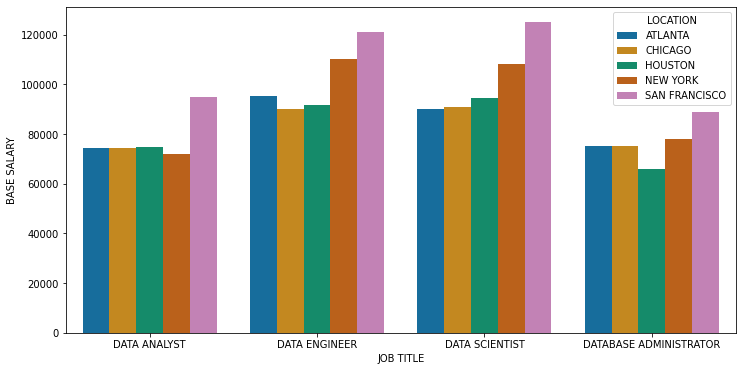

In [29]:
figure(figsize=(12, 6))
g = barplot(x='JOB TITLE', y='BASE SALARY', hue='LOCATION', data=df_summary)
set_palette(color_palette('colorblind'))